## Exercício de Aprofundamento - Trilha 7


Faça as manipulações e explorações visuais de acordo com as perguntas que precisam ser respondidas

## Análise de dados da NFL 

Pacote do R: https://cran.r-project.org/web/packages/nflfastR/index.html

Este pacote permite que dados da NFL sejam analisados, jogada a jogada, habilitando diversos tipos de tomada de decisão a partir de manipulação dos dados e geração de gráficos.

Nesta atividade de aprofundamento, vamos explorar itens estudados tanto na trilha 6 com o pacote **Tidyverse** quanto na trilha 7 com o pacote **ggplot2**.

Algumas partes desta atividade já estão prontas, como por exemplo, o carregamento do conjunto de dados geral, a impressão dos escudos dos times e a segmentação de sub-conjuntos de dados para permitir uma manipulação mais simples na atividade.

Começamos então, com a instalação do pacote *nflfastR* e os carregamentos dos pacotes necessários.

In [2]:
#install.packages("nflfastR")
#install.packages('ggimage')
library('nflfastR')

library(tidyverse)
library(ggplot2)

#library(imager)
#library(ggimage)

Como este pacote permite baixar dados de todas as temporadas, jogada a jogada, desde 1999, faremos um recorte apenas de 2014. A escolha deste ano foi aleatória, mesmo que possa parecer que foi escolhido de forma proposital por ser ultimo ano no qual *Seattle Seahawks* ganhou o *Super Bowl* (que é o jogo final da temporada e define o vencedor do campeonato). Fique a vontade para escolher qualquer outro ano, caso deseje estudar. 

>Contudo, para este exercício de aprofundamento, **mantenha o ano de 2014**.

In [3]:
temporada <- load_pbp(2014) #Carregamento dos dados, jogada a jogada, de 2014

Repare que para a seleção do subconjunto de dados, foi informado o ano da temporada desejado.

Poderiam ser um intervalo de outros anos, para isso, seria necessário definir o valor como **anoInicio:anoFim**, por exemplo: 2014:2018 e neste caso os dados seriam de 2014 até 2018.

> temporada <- load_pbp(2014:2018)

Repare que este conjunto de dados de pbp (*play-by-play* -- jogada a jogada) possui muitas variáveis. Ao chamar a função *names* colocando o nome do conjunto de dados, são retornadas todas as variáveis. Execute o bloco abaixo e conheça quais são estas variáveis.

Para conhecer os times que jogam na NFL, é possível ter um retorno de dados básicos dos cada um deles. Este retorno básico pode ser transformado em um data frame, para posteriormente, ser utilizado como filtro da estrutura.

In [ ]:
times <- teams_colors_logos %>% unique()

In [ ]:
names(times)

Aproveitando que estamos observando os times, é possível mostrar todos os seus escudos e nomes.
Para isso, execute o bloco de codigo abaixo, e veja como é a saída:

In [ ]:
for (i in 1:dim(times)[1]){
    par(mfrow=c(1,2))
    load.image(as.character(times[i,'team_wordmark'])) %>% plot ;   
    load.image(as.character(times[i,'team_logo_wikipedia'])) %>% plot ;   
    print(paste(times[i,'team_name'],times[i,'team_abbr'],sep=' >> '));
    par(mfrow=c(1,1))   
}

Vejam que é possível ter análises bem complexas e elaboradas, como por exemplo este bloco de código abaixo que foi adaptado do *Exemplo 5* de [Get Start with nflfastR](https://www.nflfastr.com/articles/nflfastR.html).

> Não é objetivo desta disciplina de introdução exigir estes elementos. Coloquei aqui apenas para caráter informativo e mostrar que é possível realizar análises tão complexas quanto desejarmos.

In [ ]:
offense <- temporada %>%
  dplyr::group_by(posteam) %>%
  dplyr::summarise(off_epa = mean(epa, na.rm = TRUE))

defense <- temporada %>%
  dplyr::group_by(defteam) %>%
  dplyr::summarise(def_epa = mean(epa, na.rm = TRUE))

logos <- teams_colors_logos %>% dplyr::select(team_abbr, team_logo_espn)

offense %>%
  dplyr::inner_join(defense, by = c("posteam" = "defteam")) %>%
  dplyr::inner_join(logos, by = c("posteam" = "team_abbr")) %>%
  ggplot2::ggplot(aes(x = off_epa, y = def_epa)) +
  ggplot2::geom_abline(slope = -1.5, intercept = c(.4, .3, .2, .1, 0, -.1, -.2, -.3), alpha = .2) +
  ggplot2::geom_hline(aes(yintercept = mean(off_epa)), color = "red", linetype = "dashed") +
  ggplot2::geom_vline(aes(xintercept = mean(def_epa)), color = "red", linetype = "dashed") +
  ggimage::geom_image(aes(image = team_logo_espn), size = 0.10, asp = 16 / 9) +
  ggplot2::labs(
    x = "Ataque EPA/jogada",
    y = "Defesa EPA/jogada",
    caption = "Dados: @nflfastR",
    title = "2014 NFL Ataque e Defesa EPA por jogada"
  ) +
  ggplot2::theme_bw() +
  ggplot2::theme(
    aspect.ratio = 9 / 16,
    plot.title = ggplot2::element_text(size = 12, hjust = 0.5, face = "bold")
  ) +
  ggplot2::scale_y_reverse()

### Manipulação de dados  

#### Criação dos *datasets* segmentados por variáveis  

**Pense no seguinte problema**. Sabendo que o time joga tanto em casa (*home_team*) quanto fora de casa (*away_team*), em qual semana o time escolhido ficou de folga. Ou seja, não há entrada de dados na variável *week*.

Para esta atividade de aprofundamento mantenha o time 'SEA' escolhido, mesmo que você explore outras oportunidades posteriormente.

In [6]:
timeEscolhido <- 'SEA'

jogosTimeEscolhido <- temporada %>% filter(home_team == timeEscolhido | away_team == timeEscolhido)

table(jogosTimeEscolhido$away_team, jogosTimeEscolhido$week)

     
        1   2   3   5   6   7   8   9  10  11  12  13  14  15  16  17  19  20
  ARI   0   0   0   0   0   0   0   0   0   0 154   0   0   0   0   0   0   0
  CAR   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 167   0
  DAL   0   0   0   0 173   0   0   0   0   0   0   0   0   0   0   0   0   0
  DEN   0   0 203   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  GB  172   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 192
  LA    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 163   0   0
  LV    0   0   0   0   0   0   0 196   0   0   0   0   0   0   0   0   0   0
  NE    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  NYG   0   0   0   0   0   0   0   0 172   0   0   0   0   0   0   0   0   0
  SEA   0 167   0 177   0 168 157   0   0 167   0 164 182   0 202   0   0   0
  SF    0   0   0   0   0   0   0   0   0   0   0   0   0 164   0   0   0   0
     
       21
  ARI   0
  CAR   0
  DAL   0
  DEN   0
  

Criação dos datasets específicos, segmentando o dataset original, para facilitar a manipulação dos dados e responder às perguntas de negócio.

Utilizando o pacote **Tidyverse**, crie novos conjuntos de dados a partir da função *select*. Garanta que todos datasets estejam fazendo um filtro apenas da semana 1.
> Dica: para o filtro da semana 1, utilize a condição **week==1** na função *filter*

**jogo** com as variáveis *play_id*, *home_team*, *away_team*, *away_score*, *home_score*, *total*

**acoesJogadas** com as variáveis *play_id*, *rush_attempt*, pass_attempt*, *field_goal_attempt*, *down*, *time*, *qtr*, *ydstogo*, *yards_gained* 

**pontuacaoJogadas** com as variáveis *play_id*, *posteam*, *defteam*, *posteam_score*, *defteam_score*, *rush*, *pass*, *name*, *passer*, *rusher*, *receiver*, *interception*, *play_type*, *pass_length*, *air_yards*, *kick_distance*, *drive*, *touchdown*, *td_team*

**descricaoJogadas** com as variáveis *play_id*,*desc*, *passer_player_name*, *passing_yards*, *receiver_player_name*, *punt_returner_player_name*,*name*


> Repare que **TODOS** conjuntos de dados criados possuem a variável *play_id*, porque ela fará o relacionamento entre os conjuntos de dados, caso você queria/precise combinar conjuntos de dados para chegar à uma solução 

In [7]:
jogo <- jogosTimeEscolhido %>%
    filter(week==1) %>%
    select(play_id,
           home_team, away_team, away_score, home_score, total
          )

In [8]:
acoesJogadas <- jogosTimeEscolhido %>%
    filter(week==1) %>%
    select(play_id,
           rush_attempt, pass_attempt, field_goal_attempt, down, time, qtr, ydstogo, yards_gained
          )

In [9]:
pontuacaoJogadas <- jogosTimeEscolhido %>%
    filter(week==1) %>%
    select(play_id,
           posteam, defteam, posteam_score, defteam_score, rush, pass, passer, rusher, receiver, interception, play_type, pass_length, air_yards, kick_distance, drive, touchdown, td_team, name
          )

In [10]:
descricaoJogadas <- jogosTimeEscolhido %>%
    filter(week==1) %>%
    select(play_id,
           desc, passer_player_name, passing_yards, receiver_player_name, punt_returner_player_name        
          )

In [ ]:
head(jogo)
head(acoesJogadas)
head(pontuacaoJogadas)
head(descricaoJogadas)

O uso da função *inner_join* no pacote **Tidyverse** é muito útil para combinar conjunto de dados. Veja, nos exemplos abaixo, como fica a combinação destes *datasets* que foram criados anteriormente.

Pense nos seguintes desafios:

**1)** Combinar o resultado de **pontuacaoJogadas** que tem a informação de quando um time fez *touchdown* (significa que marcou 6 pontos no jogo) e **descricaoJogadas** onde há uma descrição da jogada. Estes conjuntos de dados estão segmentados, cada um deles possui uma parte da informação. Ao combinar estes dois conjuntos de dados é possível ter todas as variáveis juntas como se fossem um único *dataset*. Eles se combinam a partir da variável *play_id*, que é comum entre eles. A partir desta combinação, a manipulação é similar ao que já foi estudado anteriormente.

In [ ]:
pontuacaoJogadas %>% #primeiro dataset 
inner_join(descricaoJogadas, by='play_id') %>% #segundo dataset combinando com o primeiro
select(play_id, posteam, touchdown, td_team, desc) %>% #seleção de variáveis
filter(touchdown == 1) #filtro de dados

**2)** Mostrar qual foi o jogador do time da casa e quando ele recebeu o primeiro passe que permitiu correr 5 ou mais jardas.

Para isso, é necessário cobinar 3 conjuntos de dados. No dataset **jogo** é possível retornar qual é o time da casa. Já em **acoesJogadas** é possível saber quantas jardar foram conquistadas (com a variável *yards_gained*). E por fim, em **pontuacaoJogadas** há o nome de quem correu com a bola (variável *rusher*). Vamos ver como fica essa combinação?

In [ ]:
jogo %>% #primeiro dataset 
inner_join(acoesJogadas, by='play_id') %>% #segundo dataset combinando com o primeiro
inner_join(pontuacaoJogadas, by='play_id') %>% #terceiro dataset combinando com o primeiro e o segundo
select(play_id, home_team,posteam, rusher, yards_gained, time, qtr ) %>% #seleção de variáveis
filter( posteam == home_team | yards_gained >=5 ) %>% #filtro de dados
head(1) #retorno apenas de 1 linha

#### Desafios de manipulação de dados 

Com base no dataset específico **pontuacaoJogadas**, apresente os dados somente quando ouve *rush* ou *pass* na jogada. Garanta que exista também o nome ou abreviatura do time que está atacando (variável *posteam*), além dos nomes dos jogadores que estão fazendo passe,  correndo ou recebendo a bola (variáveis *passer*, *rusher* e *receiver*)

In [11]:
# Seu código de resposta vai aqui
pontuacaoJogadas %>%
select(play_id, posteam, rusher, passer, receiver, rush, pass) %>%
filter(rush == 1 | pass == 1) %>%
head()

play_id,posteam,rusher,passer,receiver,rush,pass
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
58,GB,E.Lacy,NA,NA,1,0
79,GB,E.Lacy,NA,NA,1,0
111,GB,E.Lacy,NA,NA,1,0
132,GB,J.Starks,NA,NA,1,0
153,GB,NA,A.Rodgers,J.Nelson,0,1
177,GB,NA,A.Rodgers,NA,0,1


Utilizando o subconjunto de dados **acoesJogadas** e **pontuacaoJogadas**, crie uma análise que retorne qual foi o jogador que conquistou mais jardas no terceiro quarto.

In [12]:
# Seu código de resposta vai aqui
acoesJogadas %>%
inner_join(pontuacaoJogadas, by='play_id') %>%
select(play_id, rusher, passer, receiver, yards_gained, time, qtr) %>%
filter(qtr == 3) %>%
arrange(desc(yards_gained)) %>%
head(1)

play_id,rusher,passer,receiver,yards_gained,time,qtr
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
2485,NA,A.Rodgers,R.Cobb,23,08:17,3


#### Desafio de geração de gráfico  

Crie um gráfico de linhas, mostrando a pontuação de cada time em cada *quarter*. O resultado deve ter duas linhas, uma para cada time, e cada linha será composta pela pontuação de cada um dos *quarters* sendo uma cor para cada time. O eixo X terá os *quarters* e o eixo y terá a pontuação.

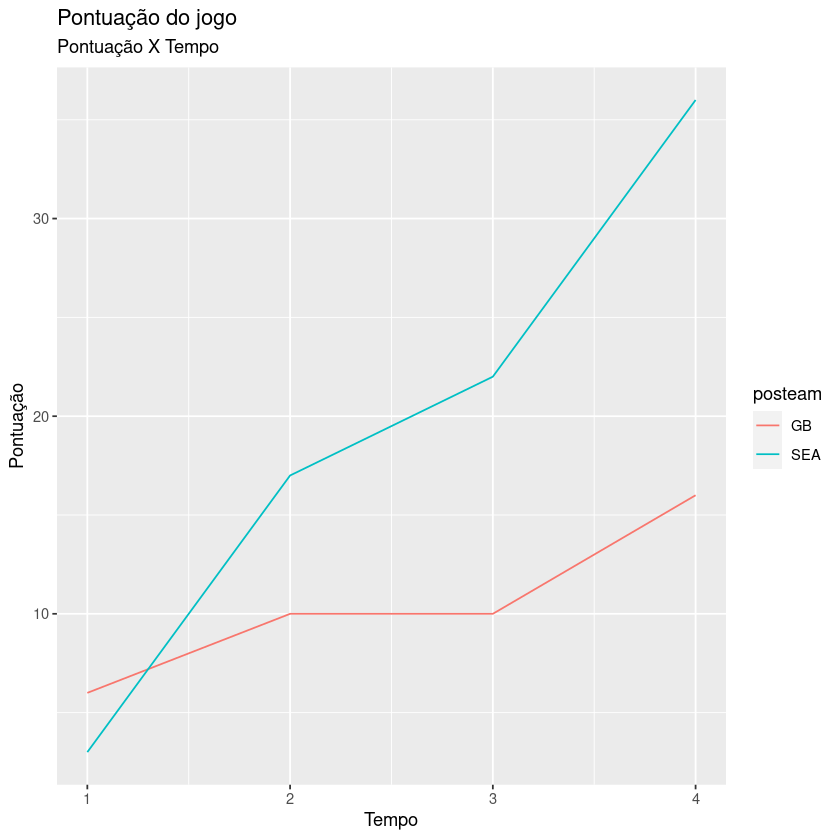

In [13]:
# Seu código de resposta vai aqui

 pontuacaoTimes <- acoesJogadas %>%
     inner_join(pontuacaoJogadas, by='play_id') %>%
     select(posteam, posteam_score, qtr) %>%
     group_by(posteam, qtr) %>%
     filter(posteam_score== max(posteam_score)) %>%
     unique() %>%
     arrange(qtr)

#head(pontuacaoTimes,10)

ggplot(pontuacaoTimes, aes(x=qtr, y=posteam_score, col=posteam)) +
  geom_line() +
  ggtitle("Pontuação do jogo", subtitle="Pontuação X Tempo") +
  xlab("Tempo") +
  ylab("Pontuação")

Crie um gráfico de barras empilhada (colunas verticais), utilizando somente as jogadas que tiveram entre 10 e 20 jardas conquistas.
O empilhamento das barras será feito pela quantidade de jardas conquistadas (entre 10 e 20). Mantenha as barras verticais segmentadas por quarter do jogo, e por fim, crie a faceta baseada nos times.


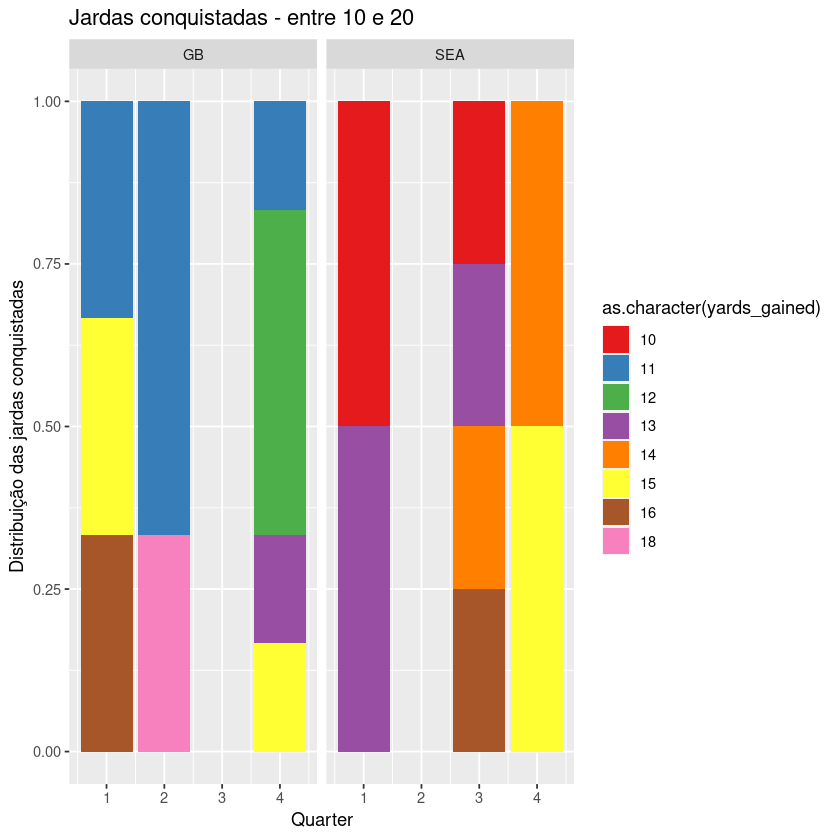

In [14]:
# Seu código de resposta vai aqui

# Select
jardasConquistadas <- acoesJogadas %>%
    inner_join(pontuacaoJogadas, by='play_id') %>%
    select(play_id, posteam, yards_gained, qtr) %>%
    filter(yards_gained >= 10 & yards_gained < 20) %>%
    arrange(desc(yards_gained))
#head(jardasConquistadas)

graficoBarras <- ggplot(jardasConquistadas, aes(x=qtr, fill=as.character(yards_gained))) +
    geom_bar(position = 'fill') +
    facet_grid(. ~ qtr) +
    xlab('Quarter') +
    ylab('Distribuição das jardas conquistadas') +
    facet_grid(. ~ posteam) + 
    ggtitle("Jardas conquistadas - entre 10 e 20") +
    scale_fill_brewer(palette = 'Set1')

graficoBarras